# **Support Vector Regression**

In [1]:
from google.colab import files
uploaded = files.upload()

In [2]:
import pandas as pd
import io

df = pd.read_csv('Student_Marks.csv')
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [3]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)

# train and test datasets are sorted for plotting purpose
train = train.sort_values('time_study')
test = test.sort_values('time_study')

X_train, X_test = train[['time_study']], test[['time_study']]
y_train, y_test = train['Marks'], test['Marks']

# **Feature Scalling**

In [4]:
from sklearn.preprocessing import StandardScaler

### When using StandardScaler(), fit() method expects a 2D array-like input
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Fitting SVR model**

In [5]:
from sklearn.svm import SVR

svr_lin = SVR(kernel = 'linear')
svr_rbf = SVR(kernel = 'rbf')
svr_poly = SVR(kernel = 'poly')

svr_lin.fit(X_train_scaled, y_train)
svr_rbf.fit(X_train_scaled, y_train)
svr_poly.fit(X_train_scaled, y_train)

SVR(kernel='poly')

# **Evaluating model performance**

Text(0, 0.5, 'Marks')

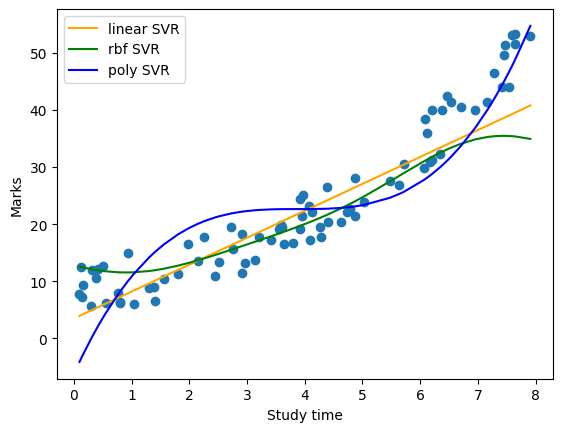

In [6]:
from matplotlib import pyplot as plt

#### Model prediction for train dataset ####
train['linear_svr_pred'] = svr_lin.predict(X_train_scaled)
train['rbf_svr_pred'] = svr_rbf.predict(X_train_scaled)
train['poly_svr_pred'] = svr_poly.predict(X_train_scaled)

#### Visualization ####
plt.scatter(train['time_study'], train['Marks'])
plt.plot(train['time_study'], train['linear_svr_pred'], color = 'orange', label = 'linear SVR')
plt.plot(train['time_study'], train['rbf_svr_pred'], color = 'green', label = 'rbf SVR')
plt.plot(train['time_study'], train['poly_svr_pred'], color = 'blue', label = 'poly SVR')
plt.legend()
plt.xlabel('Study time')
plt.ylabel('Marks')

In [7]:
import numpy as np
from sklearn import metrics

#### Test dataset - metrics ####
y_test_pred = svr_lin.predict(X_test_scaled)
r2_score = round(metrics.r2_score(y_test, y_test_pred),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)),2)
print(f'r2: {r2_score}')
print(f'rmse: {rmse}')

r2: 0.83
rmse: 6.7


Text(0, 0.5, 'Actual')

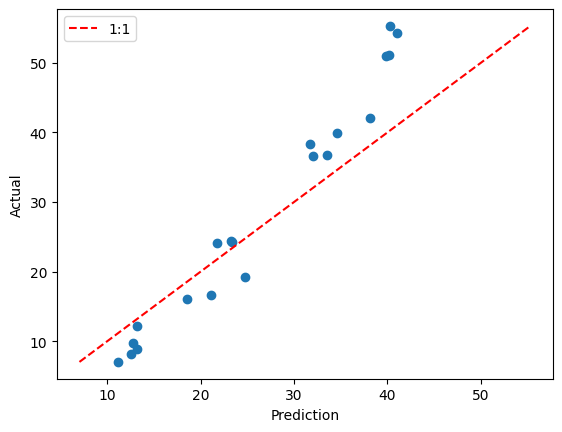

In [8]:
#### Test dataset - plot ####
y_test_pred = svr_lin.predict(X_test_scaled)
min_x = min(min(y_test_pred), min(y_test))
max_x = max(max(y_test_pred), max(y_test))
plt.scatter(y_test_pred, y_test)
plt.plot([min_x,max_x], [min_x,max_x], 'r--', label = '1:1')
plt.legend()
plt.xlabel('Prediction')
plt.ylabel('Actual')

# **Latihan Support Vector Regression**

Download dataset dari https://www.kaggle.com/datasets/mrsimple07/restaurants-revenue-prediction/data

NAMA : ALYA SHANDY AURORA

NIM : 24SP11C019

KELAS :  IF22S

In [9]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [10]:
# Ganti dengan jalur file dataset yang sebenarnya
dataset_path = 'Restaurant_revenue .csv'

# Memuat dataset
df = pd.read_csv(dataset_path)

# Memeriksa Missing values
missing_values = df.isnull().sum()
print(missing_values)

Number_of_Customers          0
Menu_Price                   0
Marketing_Spend              0
Cuisine_Type                 0
Average_Customer_Spending    0
Promotions                   0
Reviews                      0
Monthly_Revenue              0
dtype: int64


In [11]:
df.columns.tolist()

['Number_of_Customers',
 'Menu_Price',
 'Marketing_Spend',
 'Cuisine_Type',
 'Average_Customer_Spending',
 'Promotions',
 'Reviews',
 'Monthly_Revenue']

In [12]:
print(df.dtypes)

Number_of_Customers            int64
Menu_Price                   float64
Marketing_Spend              float64
Cuisine_Type                  object
Average_Customer_Spending    float64
Promotions                     int64
Reviews                        int64
Monthly_Revenue              float64
dtype: object


In [13]:
df['Cuisine_Type'] = df['Cuisine_Type'].astype('category')

In [14]:
print(df.dtypes)

Number_of_Customers             int64
Menu_Price                    float64
Marketing_Spend               float64
Cuisine_Type                 category
Average_Customer_Spending     float64
Promotions                      int64
Reviews                         int64
Monthly_Revenue               float64
dtype: object


In [15]:
df

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121
...,...,...,...,...,...,...,...,...
995,73,41.307842,12.122931,Japanese,19.033585,1,40,249.312034
996,31,20.615496,5.822885,Mexican,17.040990,0,57,110.228767
997,69,17.110656,4.141898,Japanese,44.649315,0,55,312.212552
998,73,37.664722,3.046556,Japanese,27.767358,0,23,272.482204


In [16]:
# Lakukan preprocessing pada dataset, misalnya:
# - Mengatasi nilai yang hilang
# - Encoding categorical variables jika ada
# yang akan saya lakukan untuk encoding categorical adalah mengubah Cuisine_Type menjadi
# nanti
print(df['Cuisine_Type'].unique())

['Japanese', 'Italian', 'American', 'Mexican']
Categories (4, object): ['American', 'Italian', 'Japanese', 'Mexican']


In [17]:
df['Cuisine_Type'].value_counts()

Cuisine_Type
Japanese    262
American    256
Mexican     250
Italian     232
Name: count, dtype: int64

In [19]:
#MENGGUNAKAN LABEL ENCODER
label_encoder = preprocessing.LabelEncoder()
df['Cuisine_Type'] = label_encoder.fit_transform(df['Cuisine_Type'])

df['Cuisine_Type'].unique()
df

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,2,36.236133,0,45,350.912040
1,24,40.020077,4.577892,1,17.952562,0,36,221.319091
2,81,41.981485,4.652911,2,22.600420,1,91,326.529763
3,70,43.005307,4.416053,1,18.984098,1,59,348.190573
4,30,17.456199,3.475052,1,12.766143,1,30,185.009121
...,...,...,...,...,...,...,...,...
995,73,41.307842,12.122931,2,19.033585,1,40,249.312034
996,31,20.615496,5.822885,3,17.040990,0,57,110.228767
997,69,17.110656,4.141898,2,44.649315,0,55,312.212552
998,73,37.664722,3.046556,2,27.767358,0,23,272.482204


In [20]:
df['Cuisine_Type'].value_counts()

Cuisine_Type
2    262
0    256
3    250
1    232
Name: count, dtype: int64

In [21]:
# - Feature scaling

X = df.drop(columns=['Monthly_Revenue'])
y = df['Monthly_Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# **Evaluating model performance**

In [24]:
# Inisialisasi model SVM
svr_model = SVR(kernel='linear')

# Melatih model SVM
svr_model.fit(X_train, y_train)


SVR(kernel='linear')

In [25]:
from sklearn.metrics import r2_score, mean_squared_error

# Melakukan prediksi pada data uji
y_pred = svr_model.predict(X_test)

# Evaluasi kinerja model
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R-squared (R2):", r2)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared (R2): 0.669380017311932
Root Mean Squared Error (RMSE): 60.09650874984405


# ANALISIS
Dengan nilai R-squared sebesar 0.669 dan Root Mean Squared Error (RMSE) sebesar 60.10, hasil evaluasi menunjukkan bahwa model yang dibangun cukup efektif dalam menjelaskan variasi dalam data target dan memiliki tingkat kesalahan prediksi yang moderat.




Nilai R-squared yang relatif tinggi menunjukkan bahwa model mampu menjelaskan sebagian besar variasi dalam data target. Selain itu, RMSE yang moderat menunjukkan bahwa model memiliki kesalahan prediksi yang cukup kecil.








# **Decision Tree Regression**

# **Import Library**

In [26]:
# Importing the libraries
import numpy as np # for array operations
import pandas as pd # for working with DataFrames
import requests, io # for HTTP requests and I/O commands
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline

# scikit-learn modules
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.tree import DecisionTreeRegressor # for building the model

# **Import Dataset**

Untuk masalah ini, kami akan memuat kumpulan data CSV melalui permintaan HTTP (Anda juga dapat mengunduh kumpulan data dari sini https://drive.google.com/u/0/uc?id=1mVmGNx6cbfvRHC_DvF12ZL3wGLSHD9f_&export=download).
Kumpulan data tersebut terdiri dari data terkait konsumsi bensin (dalam jutaan galon) di 48 negara bagian AS. Nilai ini didasarkan pada beberapa fitur seperti pajak bahan bakar (dalam sen), pendapatan rata-rata (dalam dolar), jalan raya beraspal (dalam mil), dan proporsi penduduk yang memiliki SIM. Kita akan memuat kumpulan data menggunakan fungsi read_csv() dari modul pandas dan menyimpannya sebagai objek Pandas DataFrame.

In [27]:
# Importing the dataset from the url of the dataset
url = "https://drive.google.com/u/0/uc?id=1mVmGNx6cbfvRHC_DvF12ZL3wGLSHD9f_&export=download"
data = requests.get(url).content

# Reading the data
dataset = pd.read_csv(io.StringIO(data.decode('utf-8')))
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


# **Memisahkan fitur dan variabel target**

> Tambahkan blockquote



Setelah memuat dataset, variabel independen dan variabel dependen perlu dipisahkan. Perhatian kami adalah memodelkan hubungan antara fitur (Pajak_Bensin, Pendapatan_Rata-rata, dll.) dan variabel target (Konsumsi_Bensin) dalam kumpulan data.

In [28]:
x = dataset.drop('Petrol_Consumption', axis = 1) # Features
y = dataset['Petrol_Consumption']  # Target

# **Memisahkan data menjadi set kereta dan set pengujian**

Kami menggunakan modul train_test_split() dari scikit-learn untuk membagi data menjadi set kereta dan set pengujian. Kami akan menggunakan 20% dari data yang tersedia sebagai set pengujian dan sisanya sebagai set pelatihan.

In [29]:
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 28)

# **Fitting the model to the training dataset**

After splitting the data, let us initialize a Decision Tree Regressor model and fit it to the training data. This is done with the help of DecisionTreeRegressor() module of scikit-learn.

In [30]:
# Initializing the Decision Tree Regression model
model = DecisionTreeRegressor(random_state = 0)

# Fitting the Decision Tree Regression model to the data
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

# **Menghitung Error setelah pelatihan**

Sekarang mari kita menghitung kerugian antara nilai target aktual dalam set pengujian dan nilai yang diprediksi oleh model dengan menggunakan fungsi biaya yang disebut Root Mean Square Error (RMSE).

RMSE suatu model menentukan kesesuaian mutlak model dengan data. Dengan kata lain, ini menunjukkan seberapa dekat titik data sebenarnya dengan nilai prediksi model. Nilai RMSE yang rendah menunjukkan kecocokan yang lebih baik dan merupakan ukuran yang baik untuk menentukan keakuratan prediksi model.

In [31]:
# Predicting the target values of the test set
y_pred = model.predict(x_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  133.351


# **Memvisualisasikan pohon keputusan**

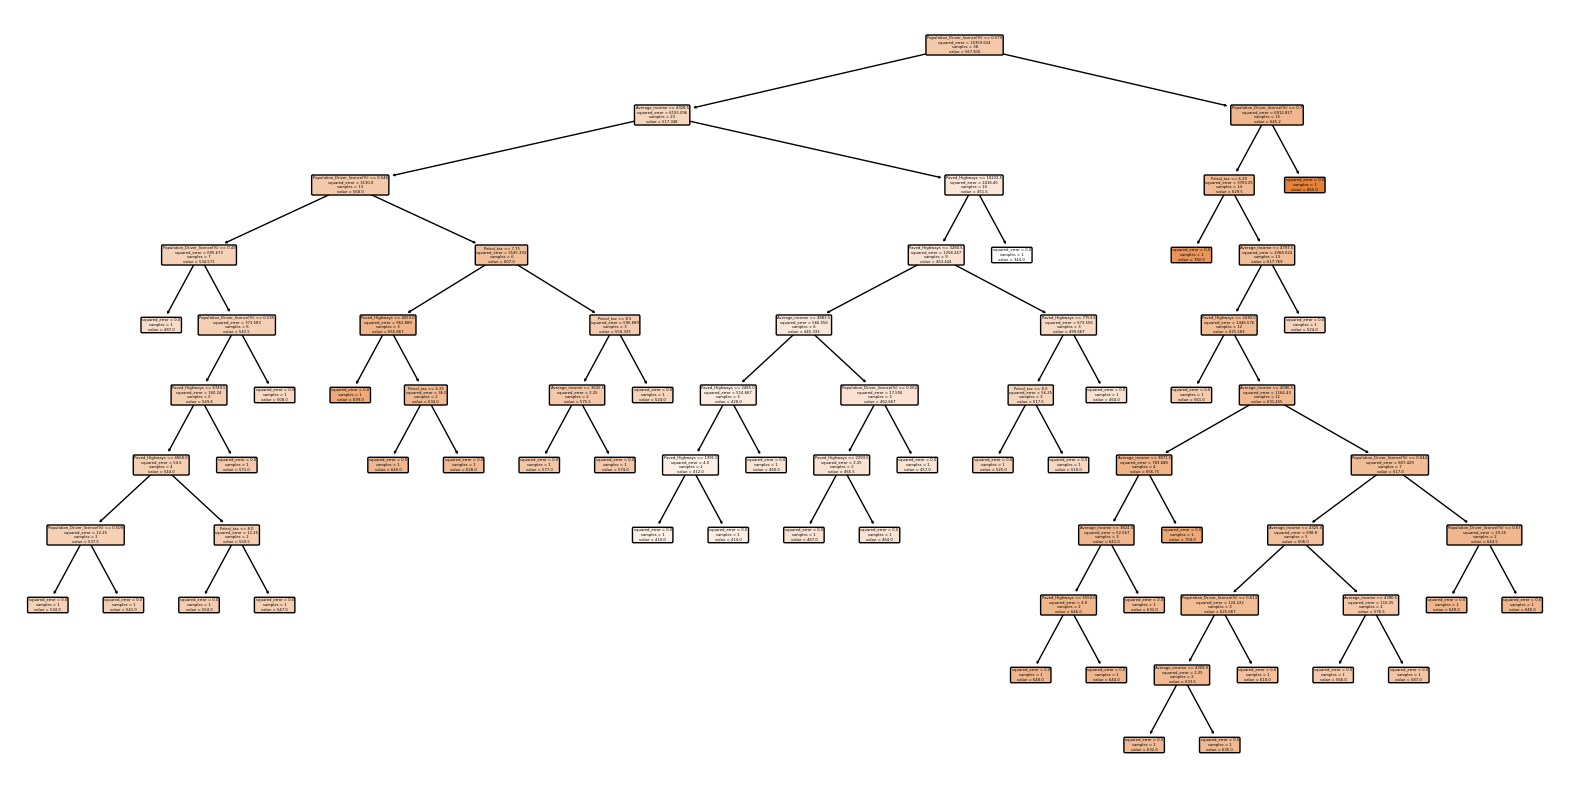

In [32]:
from sklearn.tree import plot_tree

# Visualizing the decision tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)'], rounded=True)
plt.show()

In [33]:
df = pd.read_csv("https://github.com/YBIFoundation/Dataset/raw/main/Admission%20Chance.csv", index_col=0)
print(df.head(5))

           GRE Score  TOEFL Score  University Rating   SOP  LOR   CGPA  \
Serial No                                                                
1                337          118                  4   4.5   4.5  9.65   
2                324          107                  4   4.0   4.5  8.87   
3                316          104                  3   3.0   3.5  8.00   
4                322          110                  3   3.5   2.5  8.67   
5                314          103                  2   2.0   3.0  8.21   

           Research  Chance of Admit   
Serial No                              
1                 1              0.92  
2                 1              0.76  
3                 1              0.72  
4                 1              0.80  
5                 0              0.65  


# **Latihan Decision Tree Regression**
NAMA : ALYA SHANDY AURORA

NIM : 24SP11C019

KELAS :  IF22S

Gunakan dataset ini 'https://github.com/YBIFoundation/Dataset/raw/main/Admission%20Chance.csv' untuk diselesaikan dengan Decision Tree Regression

In [34]:
# Importing the dataset from the url of the dataset
url = "https://github.com/YBIFoundation/Dataset/raw/main/Admission%20Chance.csv"
data = requests.get(url).content

# Reading the data
dataset = pd.read_csv(io.StringIO(data.decode('utf-8')))
dataset_backup = dataset.copy(deep=True)
dataset.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [35]:
dataset.columns = dataset.columns.str.lower().str.strip().str.replace(' ', '_')
dataset.head()

,serial_no,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# **MENENTUKAN TABEL YANG AKAN MEMPRESIKSI (X) HASIL (Y)**

variabel x akan mempresiksi kemungkinan di terima berdasarkan tabel atribut (serial_no, gre_score, toeflm_score, university_rating, sop, lor, cgpa, research) dan target(change_of_admit)

In [36]:
x1 = dataset.drop('chance_of_admit', axis = 1) # Features
y1 = dataset['chance_of_admit']  # Target

In [37]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 28)

In [38]:
# Initializing the Decision Tree Regression model
model1 = DecisionTreeRegressor(random_state = 0)

# Fitting the Decision Tree Regression model to the data
model1.fit(x1_train, y1_train)

DecisionTreeRegressor(random_state=0)

In [39]:
#RMSE mengukur seberapa baik model dalam memprediksi nilai sebenarnya semakin kecil semakin baik

# Predicting the target values of the test set
y1_pred = model1.predict(x1_test)

# RMSE (Root Mean Square Error)
rmse1 = float(format(np.sqrt(mean_squared_error(y1_test, y1_pred)), '.3f'))
print("\nRMSE: ", rmse1)


RMSE:  0.089


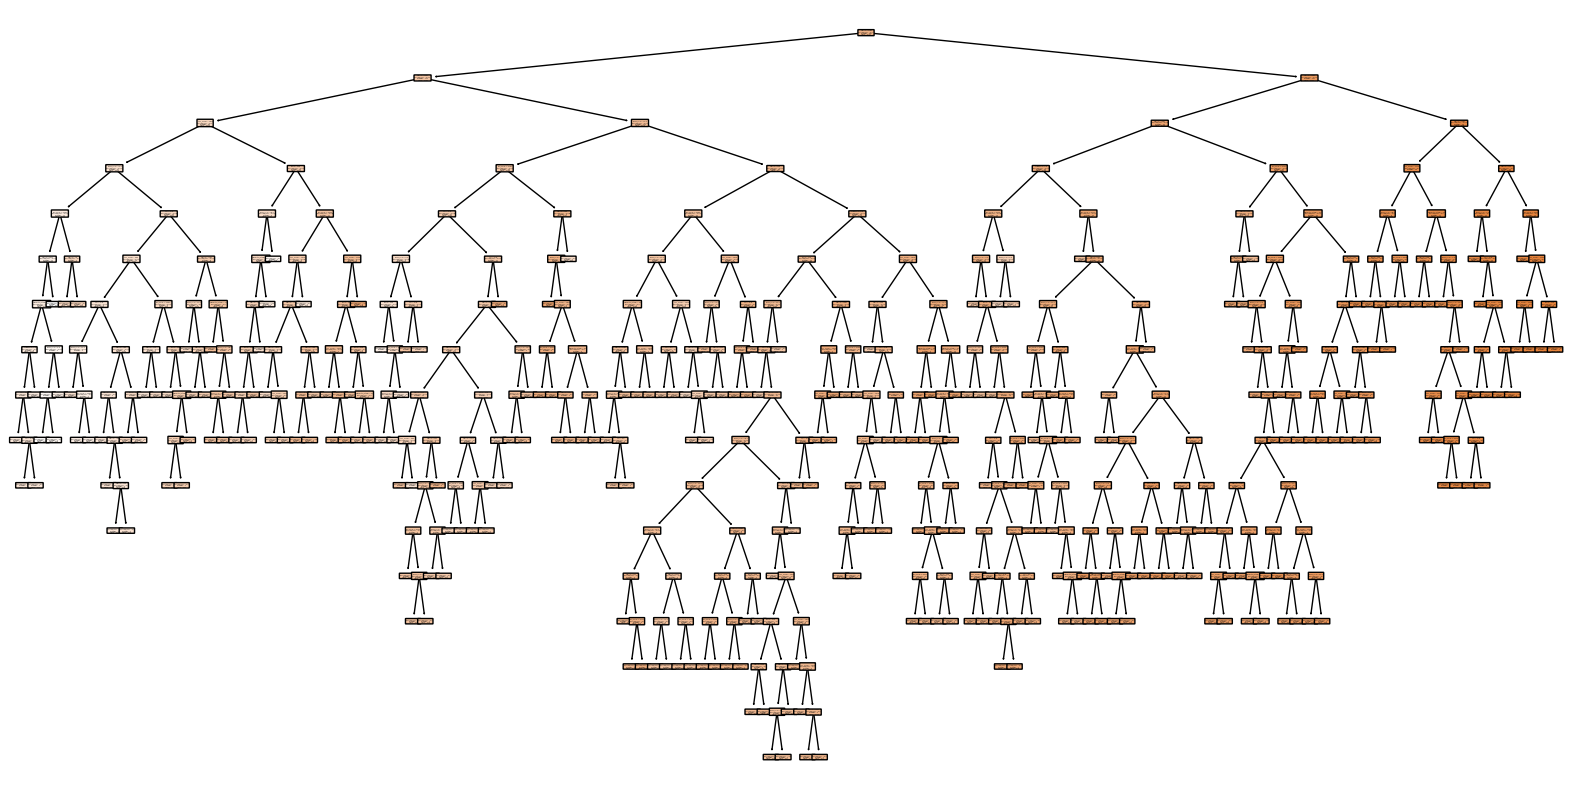

In [40]:
#MEMVISUALLISASIKAN POHON KEPUTUSAN
from sklearn.tree import plot_tree

# Visualizing the decision tree
plt.figure(figsize=(20,10))
plot_tree(model1, filled=True, feature_names=['serial_no', 'gre_score', 'toefl_score', 'university_rating', 'sop', 'lor', 'cgpa', 'research'], rounded=True)
plt.show()